# Where to open a new coffee shop?

##  Background
You are helping a client who owns coffee shops in Colorado. The company's coffee shops serve high-quality and responsibly sourced coffee,  pastries, and sandwiches. They operate three locations in Fort Collins and want to expand into Denver. 

Your client believes that the ideal location for a new store is close to affluent households, and the store appeals to the 20-35 year old demographic.
 
Your team collected geographical and demographic information about Denver's neighborhoods to assist the search. They also collected data for Starbucks stores in Denver. Starbucks and the new coffee shops do not compete for the same clients; the team included their location as a reference.

## 💪 Challenge
Provide your client a list of neighborhoods in Denver where they should consider expanding. Include:
* A visualization of Denver's neighborhoods and the Starbucks store locations.
* Find the neighborhoods with the highest proportion of people in the target demographic.
* Select the top three neighborhoods where your client should focus their search.

# Executive Summary

* Recommendations for new Starbucks locations are **Gateway - Green Valley Ranch**, **Central Park**, and **Speer**<br><br>

### Gateway - Green Valley Ranch
* Gateway - Green Valley Ranch is one of the affluent and heavily populated areas located in the Northeast in Denver Colorado. It consists of a high ratio of family versus non-family households. 
* Gateway - Green Valley Ranch has the second highest overall and the target age
group population.
* Gateway - Green Valley Ranch has the second highest number of households that make more than $100K.
* Its neighbor, Montbello has the second highest overall population and third highest target age group population next to Gateway - Green Valley Ranch.
* There is no Starbucks in Gateway - Green Valley Ranch and only one Starbuck in Montbello, therefore, Gateway - Green Valley Ranch is an ideal location.<br><br>

### Central Park
* Next candidate to open a Starbucks is Central Park.
* Central Park is the 7th populated area with the 9th highest target age group population.
* Central Park has the highest number of households that earn over $100K.
* There are 3 Starbucks locations by the west edge of the area.
* Opening a new location in the center or the other side of Central Park would be recommended.<br><br>

### Speer
* The third recommendation is Speer, which is in the center of Denver, with Capitol Hill which has the highest target age group population to the north of Speer.
* Speer has the 6th highest population of the target age group, and the 10th largest number of households that earn over $100K.
* Speer also has the 5th highest non-family household ratio of over 80%.

In [208]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

denver = pd.read_csv('./data/denver.csv')
denver

,StoreNumber,Name,PhoneNumber,Street1,Street2,Street3,PostalCode,Longitude,Latitude
0,27708-240564,Auraria Tivoli - Student Union,3035563700,900 Auraria Parkway,NaN,NaN,80204,-105.01,39.75
1,75828-94910,Grand Hyatt Denver,303-295-1234,1740 Welton St,NaN,NaN,802023940,-104.99,39.75
2,74105-23807,Safeway - Denver #1463,303-722-6117,2150 S Downing,NaN,NaN,802104528,-104.97,39.68
3,22871-102491,Safeway - Denver #1248,303-477-5091,2660 Federal Blvd,NaN,NaN,80211,-105.02,39.76
4,11105-100844,Highlands Garden Village,303-455-3382,4500 W 38th Ave,NaN,NaN,802122001,-105.05,39.77
...,...,...,...,...,...,...,...,...,...
73,78024-107376,The Curtis Hotel Lobby,720-889-4730,1405 Curtis St,NaN,NaN,802022349,-105.00,39.75
74,2817-86203,Stapleton TC-29th & Quebec,303-322-2477,7304 E. 29th Ave,NaN,NaN,802382699,-104.90,39.76
75,5425-1281,"18th & Franklin - Denver, CO",(303) 320-5518,1600 E 18th Ave,NaN,NaN,802181202,-104.97,39.74
76,9193-151286,"King Soopers-Denver, CO #26",303-758-1210,6470 E Hampden Ave,NaN,NaN,802227605,-104.91,39.65


In [2]:
neighborhoods = gpd.read_file('./data/neighborhoods.shp')
neighborhoods

,NBHD_ID,NBHD_NAME,geometry
0,2,Auraria,"POLYGON ((-105.00042 39.74552, -105.00041 39.7..."
1,21,Cory - Merrill,"POLYGON ((-104.94070 39.69540, -104.94070 39.6..."
2,7,Belcaro,"POLYGON ((-104.94070 39.71156, -104.94069 39.7..."
3,70,Washington Park,"POLYGON ((-104.95931 39.71566, -104.95931 39.7..."
4,71,Washington Park West,"POLYGON ((-104.97342 39.68982, -104.97356 39.6..."
...,...,...,...
73,77,Whittier,"POLYGON ((-104.95977 39.75072, -104.96038 39.7..."
74,18,Cole,"POLYGON ((-104.95975 39.76199, -104.96037 39.7..."
75,76,Westwood,"POLYGON ((-105.03970 39.71125, -105.03849 39.7..."
76,62,Sunnyside,"POLYGON ((-104.99818 39.78256, -104.99820 39.7..."


In [3]:
census = pd.read_csv('./data/census.csv')
census

,NBHD_ID,NBHD_NAME,POPULATION_2010,AGE_LESS_18,AGE_18_TO_34,AGE_35_TO_65,AGE_65_PLUS,NUM_HOUSEHOLDS,FAMILIES,NUM_HHLD_100K+
0,1,Athmar Park,8898.0,2649.0,2406.0,3112.0,731.0,2781.0,1964.0,425.0
1,2,Auraria,705.0,7.0,635.0,57.0,6.0,60.0,15.0,NaN
2,3,Baker,4879.0,745.0,1762.0,2037.0,335.0,2447.0,833.0,NaN
3,4,Barnum,6111.0,2015.0,1647.0,2089.0,360.0,1782.0,1289.0,120.0
4,5,Barnum West,5376.0,1579.0,1380.0,1824.0,593.0,1704.0,1207.0,NaN
...,...,...,...,...,...,...,...,...,...,...
73,74,West Colfax,9740.0,2756.0,2935.0,3111.0,938.0,3703.0,1971.0,431.0
74,75,West Highland,8540.0,1304.0,2555.0,3756.0,925.0,4256.0,1853.0,1725.0
75,76,Westwood,15486.0,5678.0,4037.0,4712.0,1059.0,4340.0,3306.0,326.0
76,77,Whittier,4831.0,1119.0,1586.0,1788.0,338.0,1993.0,1008.0,NaN


## Exploratory Data Analysis
### Basic Statistics

In [4]:
# EDA 1: Basic Stats
# Define a function to print basic stats

def get_basic_stats(df, name):
    print(f'--------<{name}>--------')
    print('\n----------------------------------------------------')
    print(f'{name} has {df.shape[0]} rows')
    print(f'{name} has {df.shape[1]} columns')
    print('\n----------------------------------------------------')
    print(df.info())
    print('\n----------------------------------------------------')
    print(df.describe(include='all'))
    print('\n')
    print(f'{name} has {df.duplicated().sum()} duplicated rows')
    
dfs = [denver, neighborhoods, census]
names = ['denver', 'neighborhoods', 'census']

for df, name in list(zip(dfs, names)):
    get_basic_stats(df, name)

--------<denver>--------

----------------------------------------------------
denver has 78 rows
denver has 9 columns

----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   StoreNumber  78 non-null     object 
 1   Name         78 non-null     object 
 2   PhoneNumber  77 non-null     object 
 3   Street1      78 non-null     object 
 4   Street2      15 non-null     object 
 5   Street3      11 non-null     object 
 6   PostalCode   78 non-null     int64  
 7   Longitude    78 non-null     float64
 8   Latitude     78 non-null     float64
dtypes: float64(2), int64(1), object(6)
memory usage: 5.6+ KB
None

----------------------------------------------------
         StoreNumber                            Name   PhoneNumber  \
count             78                              78            77   
un

### Visualization of Distribution

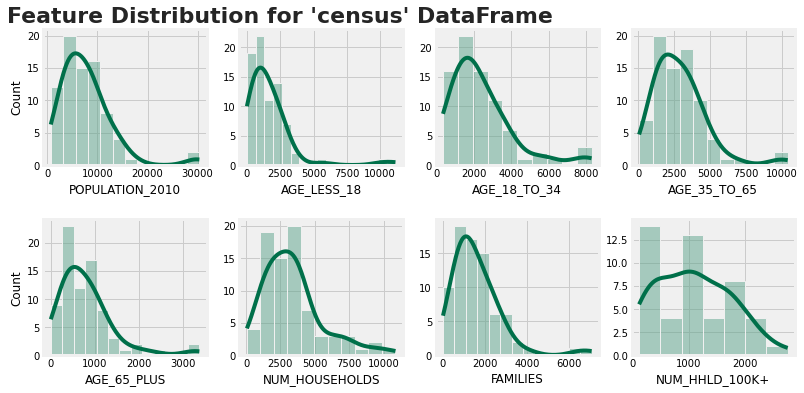

In [5]:
# Visualization 1: Distribution 
# Check distribution for these 8 columns in census
# 'POPULATION_2010', 'AGE_LESS_18', 'AGE_18_TO_34', 'AGE_35_TO_65', 'AGE_65_PLUS', 'NUM_HOUSEHOLDS', 'FAMILIES', 'NUM_HHLD_100K+'

i = 2
j = 4
plt.style.use('fivethirtyeight')
fig, axs = plt.subplots(i, j, figsize=(12, 6))
plt.subplots_adjust(hspace=0.4)
#plt.suptitle("Feature Distribution for 'census' DataFrame", fontsize=16, weight='bold')
axs[0][0].text(-8000, 22, "Feature Distribution for 'census' DataFrame", fontsize=22, weight='bold',color='#252525');

r, c = 0, 0
cols = census.columns
idx = 2
while r < i:
    while c < j:
        axs[r][c] = sns.histplot(census[cols[idx]], ax=axs[r][c], kde=True, lw=1, color='#5CA48B')
        axs[r][c].lines[0].set_color('#00704A')
        axs[r][c].set_xlabel(cols[idx], fontsize=12)
        if c != 0:
            axs[r][c].set_ylabel("")
        c += 1
        idx += 1
    r += 1
    c = 0

# 2. Exploratory Data Analysis
### denver
* 'PhoneNumber', 'Street1', 'Street2', 'Street3', 'PostalCode' --> Delete columns
* 'StoreNumber', 'Name', 'Longitude', 'Latitude' columns have no missing values
* Some values in 'Name' have leading space --> Remove a space and check duplicates

### neighborhoods
* neighborhoods dataframe has no missing values  

### census
'POPULATION_2010', 'AGE_LESS_18', 'AGE_18_TO_34', 'AGE_35_TO_65', 'AGE_65_PLUS', 'NUM_HOUSEHOLDS', 'FAMILIES', 'NUM_HHLD_100K+'
* 'NUM_HHLD_100K+' has 30 missing values

## Findings
* There are 78 Starbucks locations and 78 areas in Denver, Colorado.
* The locations are concentrated in the center of the business district.
* The center of Denver is divided into small areas.

### Entirepopulation
* Gateway - Green Valley Ranch and Montebello have the 2 highest populations.

### Target population
* Capital Hill has the highest population of the target.
* Gateway - Green Valley Ranch, Montebello, Five Points, and University have a higher population in the target age group following ## Capital Hill
* Auraria consists of more than 90% of the target age population
* CBD, University, Capital Hill, and North Capital Hill also have a high ratio of the target age population

### 'NUM_HHLD_100K+'
* About 40% of 'NUM_HHLD_100K+' is Null.
* Central Park has the largest number of households that earn more than $100K followed by Gateway - Green Valley Ranch, Montebello, Hampden, Hampden South



### Affluent Areas
* Central Park is the wealthiest area in Dever, Colorado. About 70% of households of 27000 out of 40000 makes over $100K.
* More than 50% of households in Hilltop, Washington park, Cherry Creek, and South Park Hill make more than $100K.
* Central Park, Gateway - Green Valley Ranch, Hampden, Hampden South, and Hilltop str the top 5 areas in the number of households that make over $100K.

### Family Oriented VS Non-Family Oriented
* Sun Valley is the most family-oriented area in Dever Colorado. About 75% is family. Sun Valley has the least target age group population
* Gateway - Green Valley Ranch and Montebello also have a high ratio of families, which is about 75%. Since Gateway - Green Valley Ranch and Montebello have the largest populations in Denver, the target group populations in those areas come second and third,
* Capital Hill has the highest non-family household ratio of about 90%

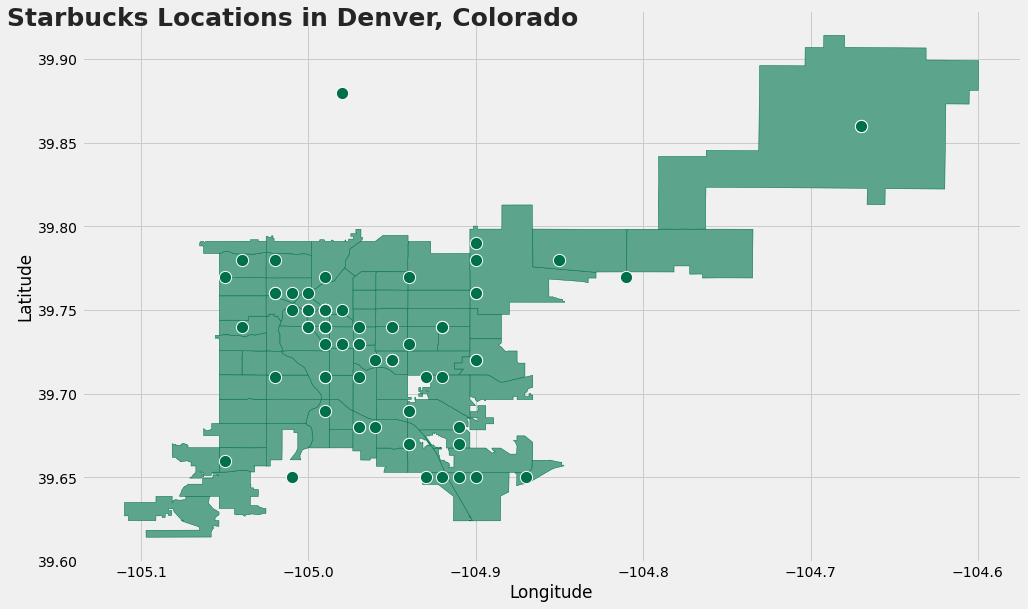

In [6]:
# Visualization 2: Denver Map and Sturbucks Locations
# Draw Denver Colorado map
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(15, 10))
denver_map = neighborhoods.plot(ax=ax, color='#5CA48B', edgecolor='#00704A')

# Add Starbucks location
sns.scatterplot(denver['Longitude'], denver['Latitude'], color='#00704A', ax=ax, marker='o', s=150);
ax.text(-105.18, 39.92, "Starbucks Locations in Denver, Colorado", fontsize=25, weight='bold', color='#252525');

In [7]:
# Function to retrun lower and upper outliers
def get_outliers(my_array):
    percentile_3rd = np.percentile(my_array , 75)   # 3rd percentile 
    percentile_1st = np.percentile(my_array , 25)   # 1st percentile
    IQR = percentile_3rd - percentile_1st           # IQR
    lower_outliers = percentile_1st - IQR * 1.5 
    upper_outliers = percentile_3rd + IQR * 1.5
    return (lower_outliers, upper_outliers)

Population greater than 17780.5 is outliers
Denver's total population in 2010 is 600158.0
2 cities population consists of 0.10% of Devver population


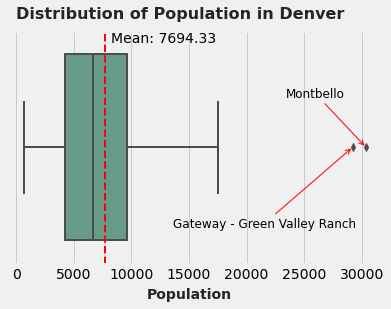

In [8]:
# Visualization 
# Boxplot 'POPULATION_2010'

# Get outliers of 'POPULATION_2010' city/county
_, upper_outliers = get_outliers(census['POPULATION_2010'])
print(f"Population greater than {upper_outliers} is outliers")

# Get 'NBHD_NAME' and 'POPULATION_2010' for 'upper_outliers'
outlier_city = census[census['POPULATION_2010'] > upper_outliers].loc[:, ['NBHD_NAME', 'POPULATION_2010']]
# Sort outlier_city by descending order of 'POPULATION_2010'
outlier_city.sort_values('POPULATION_2010', ascending=False)

# Get outlier cities' population ratio
outlier_city_population_ratio = outlier_city['POPULATION_2010'].sum()/ census['POPULATION_2010'].sum()
print(f"Denver's total population in 2010 is {census['POPULATION_2010'].sum()}")
print(f"{len(outlier_city)} cities population consists of {outlier_city_population_ratio:.2f}% of Devver population")

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(6, 4))

# Draw boxplot
sns.boxplot(census['POPULATION_2010'], ax=ax, color='#5CA48B', linewidth=2)
# Draw a virtical line representing the average of 'POPULATION_2010'
avg_population_2010 = census['POPULATION_2010'].mean()
ax.axvline(avg_population_2010, color='red', ls='--', lw=2)
ax.annotate(f"Mean: {avg_population_2010:.2f}", xy=(avg_population_2010+500, -0.45))

#Add axis label and title
ax.set_xlabel("")
ax.text(0, -0.55, "Distribution of Population in Denver", 
        fontsize=16, weight='bold', color='#252525')
ax.text(15000, 0.65, "Population", 
        color='#252525', fontsize=14, weight='bold', ha='center')

# Add outliers city/area names      
for i in range(len(outlier_city)):
        if outlier_city.iloc[i, 0] == "Montbello":
                h, v = -80, 50
        if outlier_city.iloc[i, 0] == 'Gateway - Green Valley Ranch':
                h, v = -180, -80
        ax.annotate(outlier_city.iloc[i, 0], xy=(outlier_city.iloc[i, 1], 0), 
                xytext=(h, v),
                arrowprops={"arrowstyle":"->", "color":"#FF0000", "linewidth":1}, 
                textcoords="offset points",
                fontsize=12);

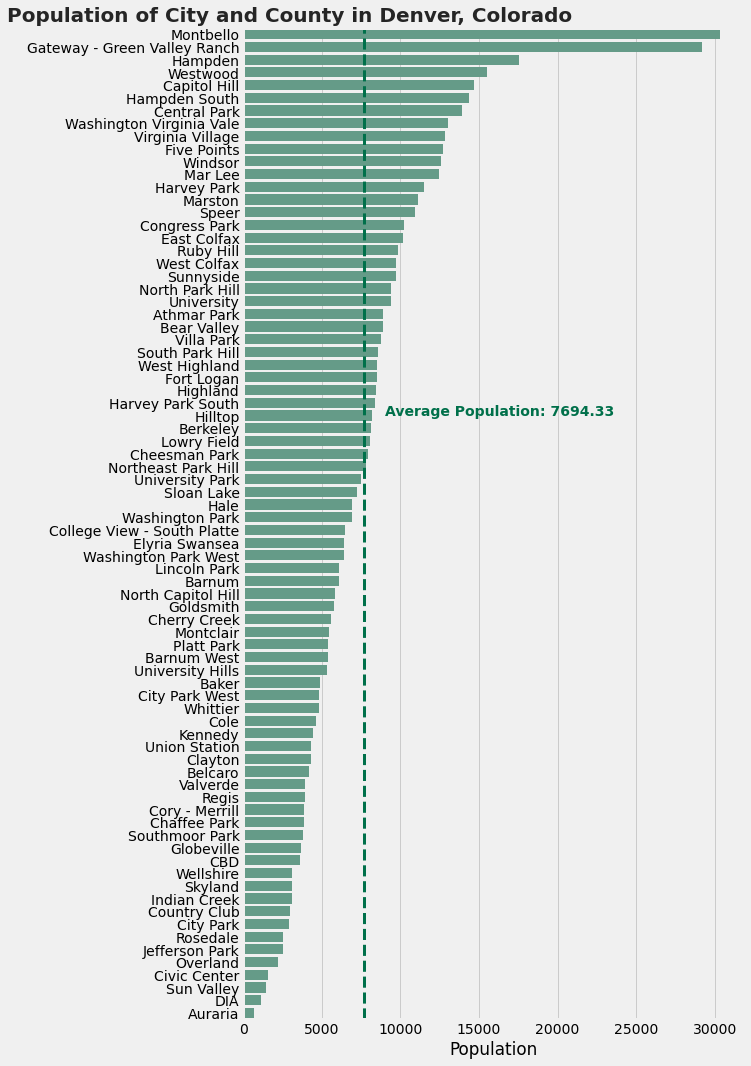

In [9]:
# Visualization 3: Population Barplot
# 'POPULATION_2010'
# Sort 'POPULATION_2010' by descending
census_sorted = census.sort_values('POPULATION_2010', ascending=False)

# Get an average population
avg_population = census_sorted['POPULATION_2010'].mean()

# Draw barplot
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(8, 17))

sns.barplot(census_sorted['POPULATION_2010'], census_sorted['NBHD_NAME'], ax=ax, color='#5CA48B')
ax.axvline(avg_population, lw=3, ls='--', c='#00704A')
ax.set_xlabel("Population")
ax.set_ylabel("")
#avg_population = mpatches.Patch(color='darkviolet', label='Average Population')
ax.text(-15000, -1, "Population of City and County in Denver, Colorado", fontsize=20, weight='bold', color='#252525');
avg_text = f"Average Population: {avg_population:.2f}"
ax.text(9000, 30, avg_text, fontsize=14, weight='bold', color='#00704A');
# ax.legend(handles=[avg_population]);

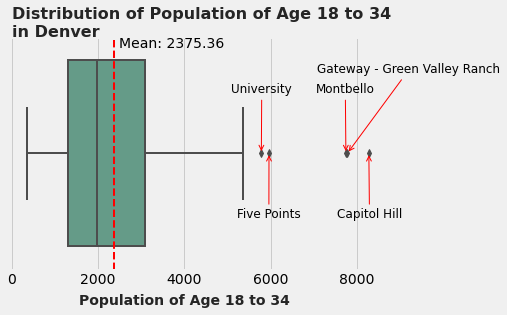

In [12]:
# Visualization 3
# Boxplot 'AGE_18_TO_34'

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(6, 4))

# Draw boxplot
sns.boxplot(census['AGE_18_TO_34'], ax=ax, color='#5CA48B', linewidth=2)
# Draw a virtical line representing the average of 'AGE_18_TO_34'
avg_18_34_population = census['AGE_18_TO_34'].mean()
ax.axvline(avg_18_34_population, color='red', ls='--', lw=2)
ax.annotate(f"Mean: {avg_18_34_population:.2f}", xy=(avg_18_34_population+100, -0.45))

#Add axis label and title
ax.set_xlabel("")
ax.text(0, -0.5, "Distribution of Population of Age 18 to 34\nin Denver", 
        fontsize=16, weight='bold', color='#252525')
ax.text(4000, 0.65, "Population of Age 18 to 34", 
        color='#252525', fontsize=14, weight='bold', ha='center')

# Add outliers city/area names      
for i in range(len(outlier_city)):
        if outlier_city.iloc[i, 0] == "University":
                h, v = -30, 60
        elif outlier_city.iloc[i, 0] == 'Capitol Hill':
                h, v = -32, -65
        elif outlier_city.iloc[i, 0] == 'Gateway - Green Valley Ranch':
                h, v = -30, 80
        elif outlier_city.iloc[i, 0] == 'Montbello':
                h, v = -30, 60
        else:
                h, v = -32, -65
        ax.annotate(outlier_city.iloc[i, 0], xy=(outlier_city.iloc[i, 1], 0), 
                    xytext=(h, v),
                    arrowprops={"arrowstyle":"->", "color":"#FF0000", "linewidth":1}, 
                    textcoords="offset points",
                    fontsize=12);

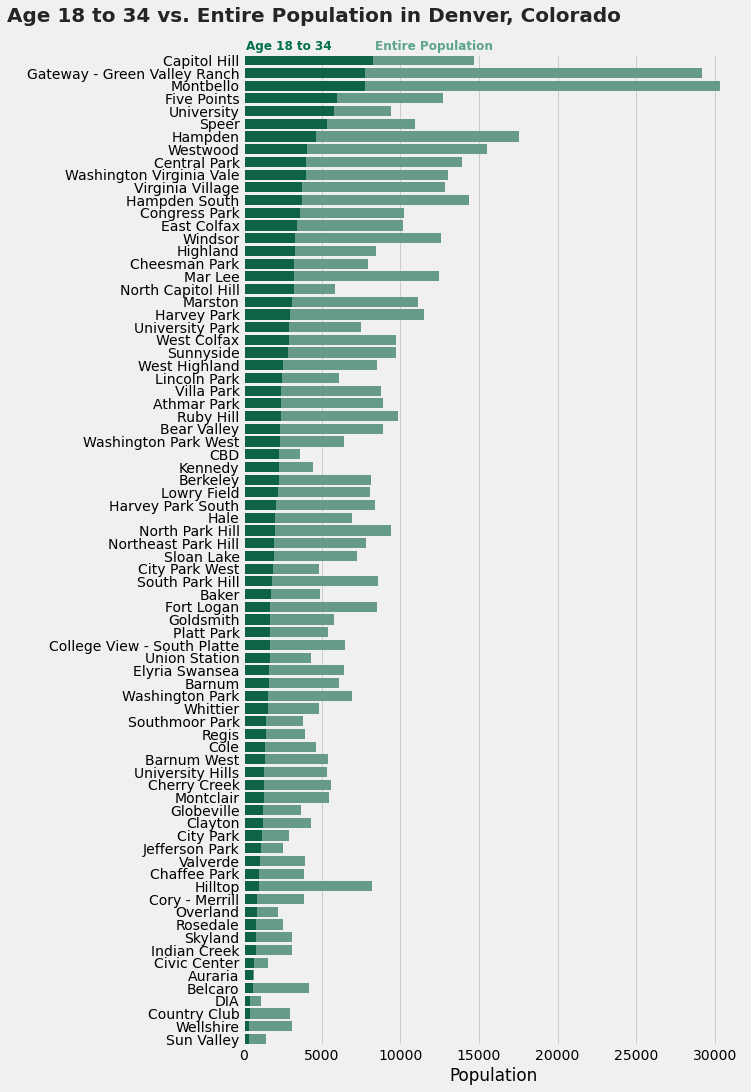

In [13]:
# Visualization 4
# Barplot to show the population of age 18 to 34 vs. the entire population

# Sort 'AGE_18_TO_34' by descending order
census_sorted_by_18_34 = census_sorted.sort_values('AGE_18_TO_34', ascending=False)

# Barplot for 'AGE_LESS_18', 'AGE_18_TO_34', 'AGE_35_TO_65', 'AGE_65_PLUS' by Name
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(8, 17))

sns.barplot(census_sorted_by_18_34['POPULATION_2010'], census_sorted_by_18_34['NBHD_NAME'], ax=ax, color='#5CA48B')
sns.barplot(census_sorted_by_18_34['AGE_18_TO_34'], census_sorted_by_18_34['NBHD_NAME'], ax=ax, color='#00704A')

#ax.axvline(avg_population, lw=1, ls='--', c='blue')
ax.set_xlabel("Population")
ax.set_ylabel("")
ax.text(-15000, -3, "Age 18 to 34 vs. Entire Population in Denver, Colorado", fontsize=20, weight='bold', color='#252525');
ax.text(200, -0.8, "Age 18 to 34", color='#00704A', fontsize=12, weight='bold')
ax.text(8400, -0.8, "Entire Population", color='#5CA48B', fontsize=12, weight='bold');

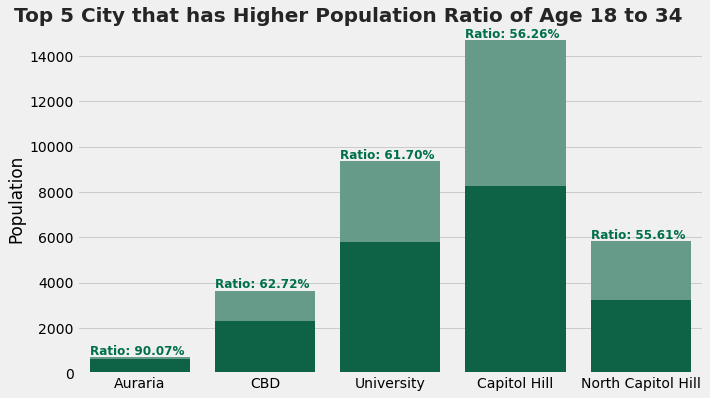

In [13]:
# Visualization 5: Ratio of 'AGE_18_TO_34' in 'POPULATION_2010'
# Barplot for 'ratio_AGE_18_TO_34' and 'AGE_18_TO_34' for top 20 city that have a higher ratio

# Calculate the ratio of 'AGE_18_TO_34' in the 'POPULATION_2010'
census['ratio_AGE_18_34'] = census['AGE_18_TO_34'] / census['POPULATION_2010'] * 100
census_sorted_by_ratio = census.sort_values('ratio_AGE_18_34', ascending=False)

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10, 6))

# Draw barplot
census_sorted_by_ratio_top_5 = census_sorted_by_ratio.head(5)
sns.barplot(census_sorted_by_ratio_top_5['NBHD_NAME'], census_sorted_by_ratio_top_5['POPULATION_2010'], ax=ax, color='#5CA48B')
sns.barplot(census_sorted_by_ratio_top_5['NBHD_NAME'], census_sorted_by_ratio_top_5['AGE_18_TO_34'], ax=ax, color='#00704A')

# Set axis lables and title
ax.set_xlabel("")
ax.set_ylabel("Population")
ax.text(-1., 15500, "Top 5 City that has Higher Population Ratio of Age 18 to 34", fontsize=20, weight='bold', color='#252525')

# Add a ratio of age 18 to 34 to the plot
for i in range(5):
    ax.text(i - 0.4, census_sorted_by_ratio_top_5.iloc[i, 2] + 100, 
            f"Ratio: {census_sorted_by_ratio_top_5.iloc[i, -1]:.2f}%", 
            color='#00704A', 
            fontsize=12, 
            weight='bold');

In [14]:
# Check Null ratio pf 'NUM_HHLD_100K+'
null_count = census['NUM_HHLD_100K+'].isnull().sum()
null_ratio = null_count / census.shape[0] * 100
#census['POPULATION_2010'] / census['NUM_HHLD_100K+'] * 100
null_ratio = round(null_ratio, 2)

print(f"{null_count} out of {census.shape[0]} is Null in 'NUM_HHLD_100K+', which is {null_ratio}%")

30 out of 78 is Null in 'NUM_HHLD_100K+', which is 38.46%


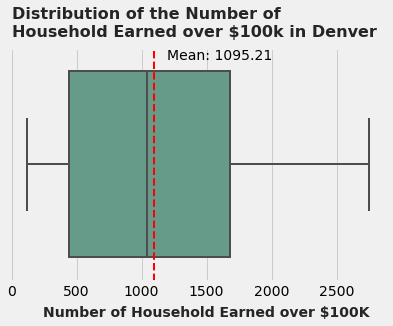

In [15]:
# Visualization 6
# Boxplot 'NUM_HHLD_100K+'

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(6, 4))

# Draw boxplot
sns.boxplot(census['NUM_HHLD_100K+'], ax=ax, color='#5CA48B', linewidth=2)
# Draw a virtical line representing the average of 'AGE_18_TO_34'
avg_number_100k = census['NUM_HHLD_100K+'].mean()
ax.axvline(avg_number_100k, color='red', ls='--', lw=2)
ax.annotate(f"Mean: {avg_number_100k:.2f}", xy=(avg_number_100k+100, -0.45))

#Add axis label and title
ax.set_xlabel("")
ax.text(0, -0.55, "Distribution of the Number of\nHousehold Earned over $100k in Denver", 
        fontsize=16, weight='bold', color='#252525')
ax.text(1500, 0.65, "Number of Household Earned over $100K", 
        color='#252525', fontsize=14, weight='bold', ha='center');

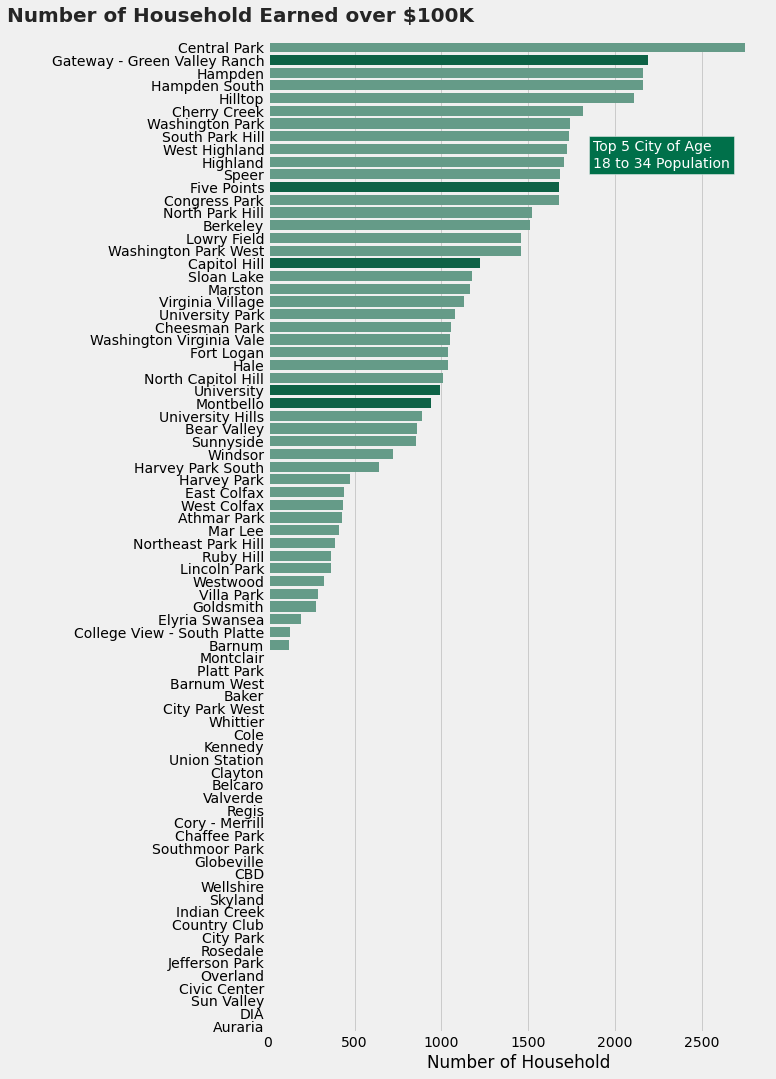

In [16]:
# Visualization 7: The number of 'NUM_HHLD_100K+'
# Barplot for the number of 'NUM_HHLD_100K+' by descending order

# Sort 'NUM_HHLD_100K+' by descending order
census_sorted_by_HHLD = census_sorted.sort_values('NUM_HHLD_100K+', ascending=False)


# Barplot 'NUM_HHLD_100K+'
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(8, 17))

# Highlight city/county that have higher population of age 18 to 34
custom_palette = {}
for city in census_sorted_by_HHLD['NBHD_NAME']:
    if city in outlier_city['NBHD_NAME'].to_list():
        custom_palette[city] = '#00704A'
    else:
        custom_palette[city] = '#5CA48B'

sns.barplot(census_sorted_by_HHLD['NUM_HHLD_100K+'], census_sorted_by_HHLD['NBHD_NAME'], palette=custom_palette)
#ax.axvline(avg_population, lw=3, ls='--', c='#00704A')

# Add a title, xlabel, and ylabel
ax.set_xlabel("Number of Household")
ax.set_ylabel("")
ax.text(-1500, -2, "Number of Household Earned over $100K", fontsize=20, weight='bold', color='#252525')

# these are matplotlib.patch.Patch properties
props = dict(facecolor='#00704A')

# place a text box in upper left in axes coords
ax.text(0.65, 0.9, 'Top 5 City of Age\n18 to 34 Population', transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props, color='white');

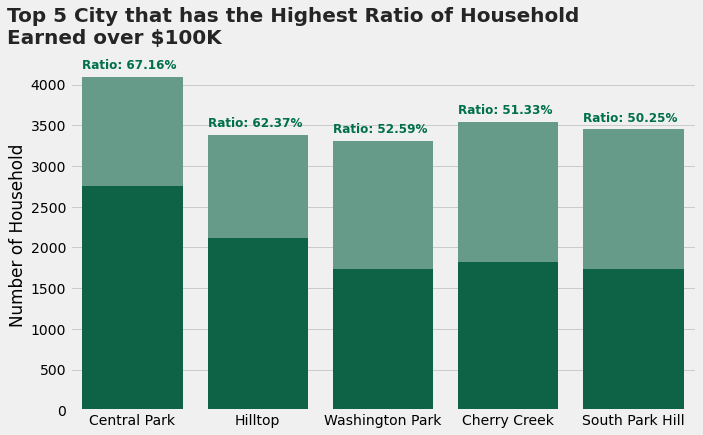

In [19]:
# Visualization 8: Ratio of 'NUM_HHLD_100K+' in 'NUM_HOUSEHOLDS' and 'FAMILIES' in 'NUM_HOUSEHOLDS'
# Barplot for 'ratio_AGE_18_TO_34' and 'AGE_18_TO_34' for top 20 city that have a higher ratio

# Calculate the ratio of 'NUM_HHLD_100K+' in the 'NUM_HOUSEHOLDS'
census['ratio_HHLD_100K+'] = census['NUM_HHLD_100K+'] / census['NUM_HOUSEHOLDS'] * 100
census_sorted_by_ratio_100k = census.sort_values('ratio_HHLD_100K+', ascending=False)

census_sorted_by_ratio_100k_top_5 = census_sorted_by_ratio_100k.head()

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10, 6))

# Draw barplot
sns.barplot(census_sorted_by_ratio_100k_top_5['NBHD_NAME'], census_sorted_by_ratio_100k_top_5['NUM_HOUSEHOLDS'], ax=ax, color='#5CA48B')
sns.barplot(census_sorted_by_ratio_100k_top_5['NBHD_NAME'], census_sorted_by_ratio_100k_top_5['NUM_HHLD_100K+'], ax=ax, color='#00704A')

# Set axis lables and title
ax.set_xlabel("")
ax.set_ylabel("Number of Household")
ax.text(-1, 4500, "Top 5 City that has the Highest Ratio of Household\nEarned over $100K", fontsize=20, weight='bold', color='#252525')

# Add a ratio of household earned over $100K
for i in range(5):
    ax.text(i - 0.4, census_sorted_by_ratio_100k_top_5.iloc[i, 7]+100, 
            f"Ratio: {census_sorted_by_ratio_100k_top_5.iloc[i, 10]:.2f}%", 
            color='#00704A', 
            fontsize=12, 
            weight='bold');

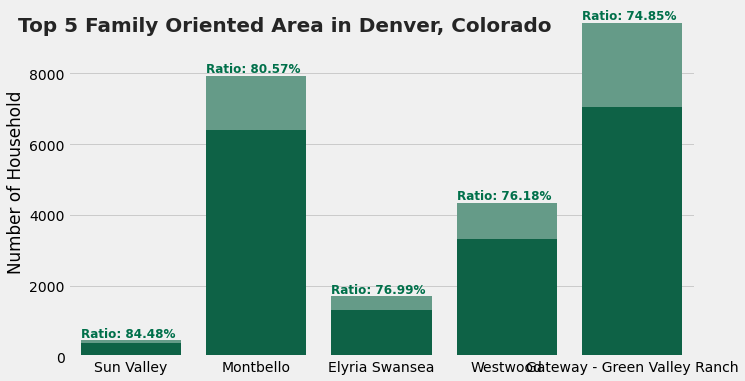

In [21]:
# Visualization 9: Ratio of 'FAMILIES' in 'NUM_HOUSEHOLDS'
# Barplot for the top 5 ratio of 'FAMILIES' in 'NUM_HOUSEHOLDS' 

# Calculate the ratio of 'FAMILIES' in the 'NUM_HOUSEHOLDS'
census['ratio_families'] = census['FAMILIES'] / census['NUM_HOUSEHOLDS'] * 100
census_sorted_by_ratio_families = census.sort_values('ratio_families', ascending=False)

census_sorted_by_ratio_families_top_5 = census_sorted_by_ratio_families.head()

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10, 6))

# Draw barplot
sns.barplot(census_sorted_by_ratio_families_top_5['NBHD_NAME'], census_sorted_by_ratio_families_top_5['NUM_HOUSEHOLDS'], ax=ax, color='#5CA48B')
sns.barplot(census_sorted_by_ratio_families_top_5['NBHD_NAME'], census_sorted_by_ratio_families_top_5['FAMILIES'], ax=ax, color='#00704A')

# Set axis lables and title
ax.set_xlabel("")
ax.set_ylabel("Number of Household")
ax.text(-0.9, 9200, "Top 5 Family Oriented Area in Denver, Colorado", fontsize=20, weight='bold', color='#252525')

# Add a ratio of families in the household
for i in range(5):
    ax.text(i - 0.4, census_sorted_by_ratio_families_top_5.iloc[i, 7]+100, 
            f"Ratio: {census_sorted_by_ratio_families_top_5.iloc[i, -1]:.2f}%", 
            color='#00704A', 
            fontsize=12, 
            weight='bold');

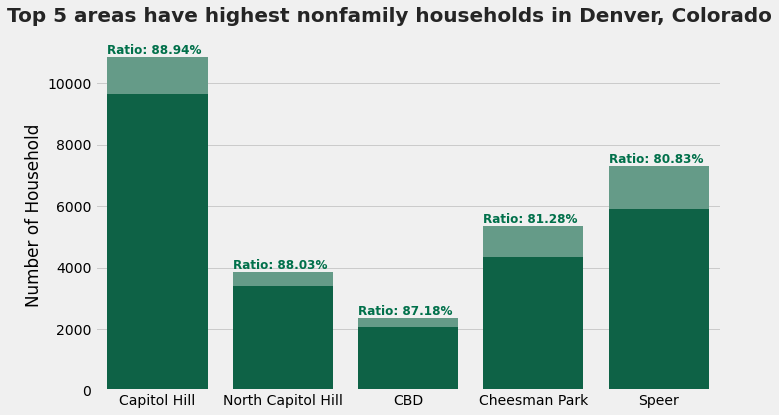

In [22]:
# Visualization 10: Ratio of non-'FAMILIES' in 'NUM_HOUSEHOLDS'
# Barplot for the top 5 ratio of non-'FAMILIES' in 'NUM_HOUSEHOLDS' 

# Calculate the ratio of 'FAMILIES' in the 'NUM_HOUSEHOLDS'
census['ratio_non_families'] = (census['NUM_HOUSEHOLDS']- census['FAMILIES']) / census['NUM_HOUSEHOLDS'] * 100
census_sorted_by_ratio_non_families = census.sort_values('ratio_non_families', ascending=False)

census_sorted_by_ratio_non_families_top_5 = census_sorted_by_ratio_non_families.head()

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10, 6))

# Draw barplot
sns.barplot(census_sorted_by_ratio_non_families_top_5['NBHD_NAME'], census_sorted_by_ratio_non_families_top_5['NUM_HOUSEHOLDS'], ax=ax, color='#5CA48B')
sns.barplot(census_sorted_by_ratio_non_families_top_5['NBHD_NAME'], 
            census_sorted_by_ratio_non_families_top_5['NUM_HOUSEHOLDS'] - census_sorted_by_ratio_non_families_top_5['FAMILIES'], ax=ax, color='#00704A')

# Set axis lables and title
ax.set_xlabel("")
ax.set_ylabel("Number of Household")
ax.text(-1.2, 12000, "Top 5 areas have highest nonfamily households in Denver, Colorado", fontsize=20, weight='bold', color='#252525')

# Add a ratio of families in the household
for i in range(5):
    ax.text(i - 0.4, census_sorted_by_ratio_non_families_top_5.iloc[i, 7]+100, 
            f"Ratio: {census_sorted_by_ratio_non_families_top_5.iloc[i, -1]:.2f}%", 
            color='#00704A', 
            fontsize=12, 
            weight='bold');

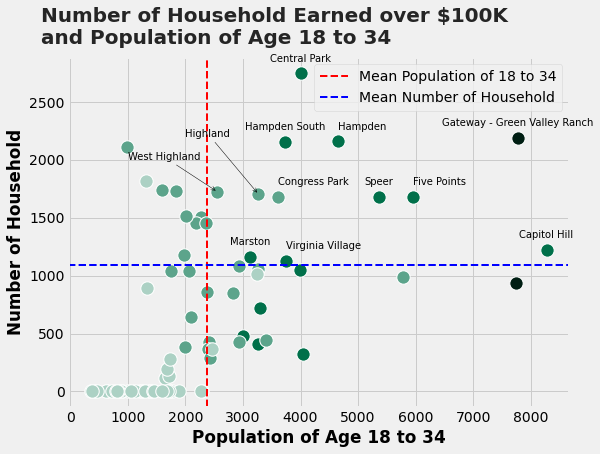

In [205]:
# K-means Clustering
# Delete categorical features
census_selected_features = census.drop(['NBHD_ID', 'NBHD_NAME', 'ratio_HHLD_100K+', 'ratio_families','ratio_non_families'], axis=1)
# Delete rows contain Null in 'NUM_HHLD_100K+'
census_selected_features['NUM_HHLD_100K+'] = census_selected_features['NUM_HHLD_100K+'].fillna(0)

# k-means classification
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=4, random_state=0)
k_means.fit(census_selected_features)
census_selected_features['label'] = k_means.labels_

census_selected_features_0 = census_selected_features[census_selected_features['label'] == 0]
census_selected_features_1 = census_selected_features[census_selected_features['label'] == 1]
census_selected_features_2 = census_selected_features[census_selected_features['label'] == 2]
census_selected_features_3 = census_selected_features[census_selected_features['label'] == 3]

# Visualization 11
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(8, 6))

# Draw a virtical (avg_18_34) and horizontal (avg_100K) lines
ax.axvline(avg_18_34, color = 'red', lw=2, ls='--', label='Mean Population of 18 to 34')
ax.axhline(avg_100K, color = 'blue', lw=2, ls='--', label='Mean Number of Household')
ax.legend(bbox_to_anchor=(1.0, 0), loc='lower right')

# Add a title, xlabel, and ylabel
ax.set_xlabel("Population of Age 18 to 34", weight='bold')
ax.set_ylabel("Number of Household", weight='bold')
ax.text(-500, 3000, "Number of Household Earned over $100K\nand Population of Age 18 to 34", 
        fontsize=20, weight='bold', color='#252525')

# Filter census avg_100K and avg_18_34
filtered_census = census[(census['NUM_HHLD_100K+'] > avg_100K) & (census['AGE_18_TO_34'] > avg_18_34)]

# Add 'NBHD_NAME' 
for i in range(len(filtered_census)):
    if filtered_census.iloc[i, 1] in ['Hampden', 'Five Points', 'Virginia Village', 'Congress Park']:
                                           ax=ax, 
        ha = 'left'
        ax.text(filtered_census.iloc[i, 4], filtered_census.iloc[i, 9] + 100, filtered_census.iloc[i, 1], fontsize=10, ha=ha)
    elif not(filtered_census.iloc[i, 1] in ['West Highland', 'Highland']):
        ha = 'center'
        ax.text(filtered_census.iloc[i, 4], filtered_census.iloc[i, 9] + 100, filtered_census.iloc[i, 1], fontsize=10, ha=ha)
    elif filtered_census.iloc[i, 1] == 'West Highland':
        h = 1000
        v = 2000
        ax.annotate(filtered_census.iloc[i, 1], xy=(filtered_census.iloc[i, 4], filtered_census.iloc[i, 9]), xytext=(h, v), 
                    arrowprops={"arrowstyle":"->", "color":"#000000"}, fontsize=10)
    else:
        h = 2000
        v = 2200
        ax.annotate(filtered_census.iloc[i, 1], xy=(filtered_census.iloc[i, 4], filtered_census.iloc[i, 9]), xytext=(h, v), 
                            arrowprops={"arrowstyle":"->", "color":"#000000"}, fontsize=10) 
# Draw scatterplot for each label       
sns.scatterplot(census_selected_features_2['AGE_18_TO_34'], census_selected_features_2['NUM_HHLD_100K+'], color='#001E13', s=180)
sns.scatterplot(census_selected_features_1['AGE_18_TO_34'], census_selected_features_1['NUM_HHLD_100K+'], color='#00704A', s=180)
sns.scatterplot(census_selected_features_3['AGE_18_TO_34'], census_selected_features_3['NUM_HHLD_100K+'], color='#5CA48B', s=180)
sns.scatterplot(census_selected_features_0['AGE_18_TO_34'], census_selected_features_0['NUM_HHLD_100K+'], color='#ACD1C4', s=180);

## Denver Colorado Map

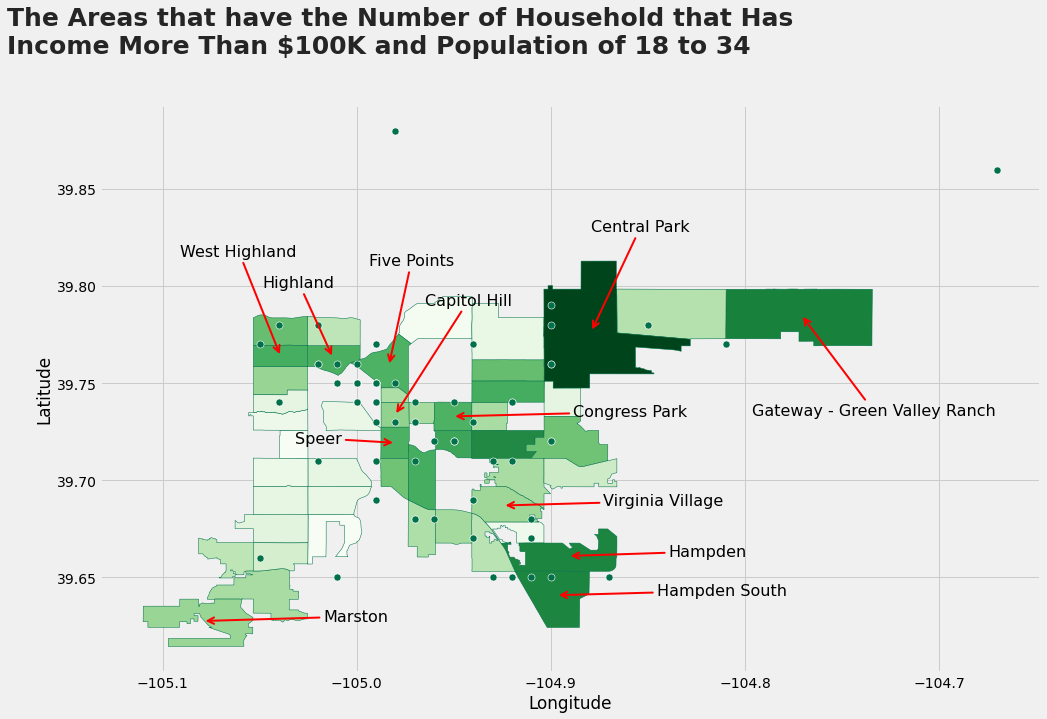

In [214]:
# Get areas that have more than average number of the target population and wealthy household 
over_average_18_34_100k = filtered_census["NBHD_NAME"]

# Merge neighborhoods and census
census_neighborhoods = census.merge(neighborhoods)

# # Top 5 areas with the population of age 18 to 34
top5_18_34 = census_neighborhoods.sort_values('AGE_18_TO_34', ascending=False).head()

# Convert Pandas DataFrame to GeoPandas GeoDataFrame
gpd_census_neighborhoods = gpd.GeoDataFrame(census_neighborhoods)

# Make the legend bar shorter
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="7%", pad=0.1)

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(15, 10))

# Draw the map and legend
denver_map = gpd_census_neighborhoods.plot(column = 'NUM_HHLD_100K+', 
                                           legend=True, 
                                           ax=ax, 
                                           cmap='Greens',
                                           cax=cax,
                                           edgecolor='#00704A')

# Add Starbucks location
sns.scatterplot(denver['Longitude'], denver['Latitude'], color='#00704A', ax=ax, marker='o', s=50)

# Add the title
ax.text(-105.18, 39.92, "The Areas that have the Number of Household that Has\nIncome More Than $100K and Population of 18 to 34", fontsize=25, weight='bold', color='#252525')

# Add the city/county name to the map
neighborhoods["center"] = neighborhoods["geometry"].centroid
neighborhoods_points = neighborhoods.copy()
neighborhoods_points.set_geometry("center", inplace = True)
# texts = []
for x, y, label in zip(neighborhoods_points.geometry.x, neighborhoods_points.geometry.y, neighborhoods_points["NBHD_NAME"]):   
    # Add the top 5 area names
    if label in list(over_average_18_34_100k):
        if label == "Gateway - Green Valley Ranch":
            h, v = -50, -100
        if label == "Central Park":
            h, v = 0, 100
        if label == "Hampden":
            h, v = 100, 0
        if label == "Hampden South":
            h, v = 100, 0
        if label == "Virginia Village":
            h, v = 100, 0
        if label == "Hampden South":
            h, v = 100, 0
        if label ==  "West Highland":
            h, v = -100, 100  
        if label ==  "Highland":
            h, v = -70, 70   
        if label ==  "Capitol Hill": 
            h, v = 30, 110
        if label ==  "Five Points": 
            h, v = -20, 100
        if label ==  "Congress Park": 
            h, v = 120, 0
        if label ==  "Speer": 
            h, v = -100, 0
        ax.annotate(label, xy=(x, y), xytext=(h, v), 
                        arrowprops={"arrowstyle":"->", "color":"#FF0000", "linewidth":2}, 
                        textcoords="offset points",
                        fontsize=16);

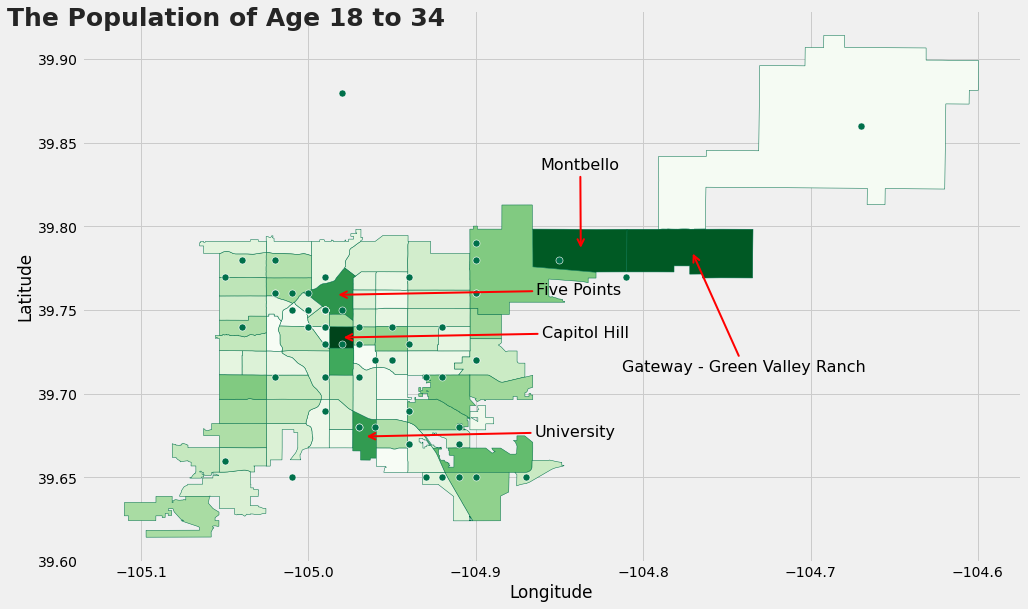

In [215]:
# Visualization 12: Choropleth Map for  and Sturbucks Locations 
# Draw Denver Colorado map

# Merge neighborhoods and census
census_neighborhoods = census.merge(neighborhoods)

# # Top 5 areas with the population of age 18 to 34
top5_18_34 = census_neighborhoods.sort_values('AGE_18_TO_34', ascending=False).head()

# Convert Pandas DataFrame to GeoPandas GeoDataFrame
gpd_census_neighborhoods = gpd.GeoDataFrame(census_neighborhoods)

# Make the legend bar shorter
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="7%", pad=0.1)

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(15, 10))

# Make the legend bar shorter

denver_map = gpd_census_neighborhoods.plot(column = 'AGE_18_TO_34', 
                                           legend=True, 
                                           ax=ax, 
                                           cmap='Greens',
                                           cax=cax,
                                           edgecolor='#00704A')
gpd_census_neighborhoods.explore(tooltip='NBHD_NAME')

# Add Starbucks location
sns.scatterplot(denver['Longitude'], denver['Latitude'], color='#00704A', ax=ax, marker='o', s=50)

# Add title
ax.text(-105.18, 39.92, "The Population of Age 18 to 34", fontsize=25, weight='bold', color='#252525');

# Add city/county
# for city in census['NBHD_NAME']:
# Add the city/county name
# Add the city/county name to the map
neighborhoods["center"] = neighborhoods["geometry"].centroid
neighborhoods_points = neighborhoods.copy()
neighborhoods_points.set_geometry("center", inplace = True)
texts = []
for x, y, label in zip(neighborhoods_points.geometry.x, neighborhoods_points.geometry.y, neighborhoods_points["NBHD_NAME"]):   
    # Add the top 5 area names
    if label in list(top5_18_34["NBHD_NAME"]):
        if label == "Gateway - Green Valley Ranch":
            h, v = -70, -120
        if label == "University":
            h, v = 170, 0
        if label ==  "Montbello":
            h, v = -40, 80  
        if label ==  "Five Points":
            h, v = 200, 0   
        if label ==  "Capitol Hill": 
            h, v = 200, 0
        ax.annotate(label, xy=(x, y), xytext=(h, v), 
                        arrowprops={"arrowstyle":"->", "color":"#FF0000", "linewidth":2}, 
                        textcoords="offset points",
                        fontsize=16) 


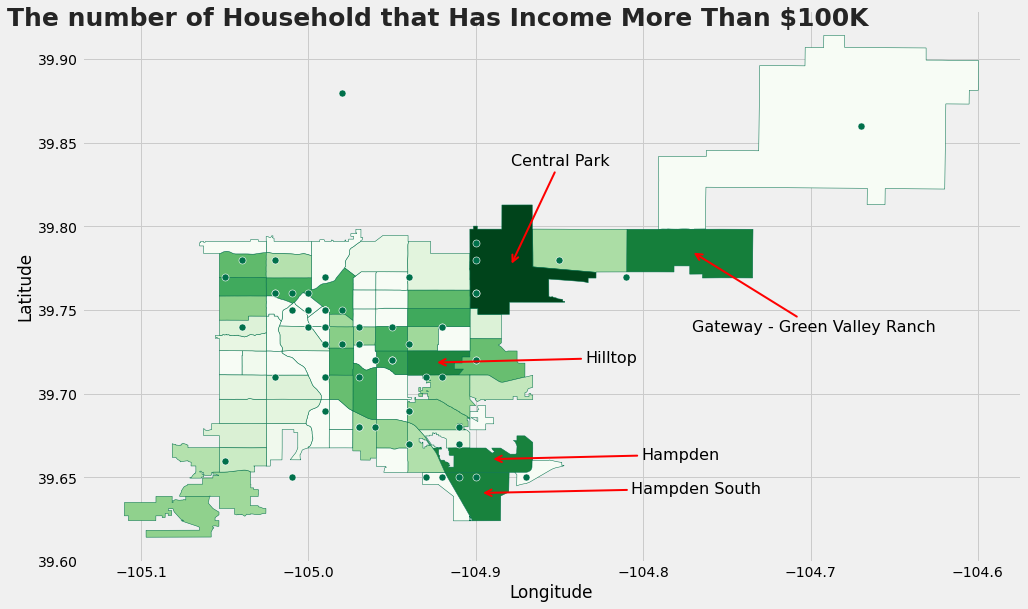

In [210]:
# Visualization 13: Choropleth Map for  and Sturbucks Locations 
# Draw Denver Colorado map

# Convert Pandas DataFrame to GeoPandas GeoDataFrame
gpd_census_neighborhoods = gpd.GeoDataFrame(census_neighborhoods)

# Fill null with 0
census_neighborhoods['NUM_HHLD_100K+'].fillna(0, inplace=True)

# # Top 5 richest area
top5_rich_neighbors = census_neighborhoods.sort_values('NUM_HHLD_100K+', ascending=False).head()
top5_rich = top5_rich_neighbors['NBHD_NAME']

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(15, 10))

# Draw the map and legend
denver_map = gpd_census_neighborhoods.plot(column = 'NUM_HHLD_100K+', 
                                           legend=True, 
                                           ax=ax, 
                                           cmap='Greens',
                                           cax=cax,
                                           edgecolor='#00704A')

# Add Starbucks location
sns.scatterplot(denver['Longitude'], denver['Latitude'], color='#00704A', ax=ax, marker='o', s=50)

# Add the title
ax.text(-105.18, 39.92, "The number of Household that Has Income More Than $100K", fontsize=25, weight='bold', color='#252525')

# Add the city/county name to the map
neighborhoods["center"] = neighborhoods["geometry"].centroid
neighborhoods_points = neighborhoods.copy()
neighborhoods_points.set_geometry("center", inplace = True)
texts = []
for x, y, label in zip(neighborhoods_points.geometry.x, neighborhoods_points.geometry.y, neighborhoods_points["NBHD_NAME"]):   
    # Add the top 5 area names
    if label in list(top5_rich):
        if label == "Central Park":
            h, v = 0, 100
        if label == "Gateway - Green Valley Ranch":
            h, v = 0, -80
        if label ==  "Hampden":
            h, v = 150, 0  
        if label ==  "Hilltop":
            h, v = 150, 0   
        if label ==  "Hampden South": 
            h, v = 150, 0
        ax.annotate(label, xy=(x, y), xytext=(h, v), 
                        arrowprops={"arrowstyle":"->", "color":"#FF0000", "linewidth":2}, 
                        textcoords="offset points",
                        fontsize=16)